# PADPy 2020/2021 
## Praca domowa nr 1

Raport zawiera:
    1. Przedstawienie wizualizacji otrzymywanych wyników
    2. Testy poprawności zaimplementowanych metod
    3. Podsumowanie

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import numpy as np

from spectral import spectral_clustering

## Wizualizacja otrzymanych wyników

Na potrzeby tego skryptu, do graficznej reprezentacji wyników zostały przygotowane funkcje **plot_2D** i **plot_3D**:

In [2]:
def plot_2D(X, k, labels):
    """
    Funkcja przyjmuje dwuwymiarową macierz X o wymiarach (n,2) i wektor etykiet, 
    gdzie labels[i] to etykieta X[i] punktu.
    Funkcja rysuje wykres 2D punktów z X z podziałem na kolory według odpowiadających im etykiet.
    Funckja jest używana jedynie w tym skrypcie, więc zakładana jest poprawność danych wejściowych.
    """
    
    colors = cycle('bgrcmyk')
    for k, col in zip(range(k), colors):
        class_members = labels == k
        plt.scatter(X[class_members, 0], X[class_members, 1], c=col)

    plt.title('Analiza skupień')
    plt.show()
    
def plot_3D(X, k, labels):
    """
    Funkcja przyjmuje dwuwymiarową macierz X o wymiarach (n,3) i wektor etykiet, 
    gdzie labels[i] to etykieta X[i] punktu.
    Funkcja rysuje wykres 3D punktów z X z podziałem na kolory według odpowiadających im etykiet.
    Funkcja jest używana jedynie w tym skrypcie, więc zakładana jest poprawność danych wejściowych.
    """
    
    colors = cycle('bgrcmyk')
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
        
    for k, col in zip(range(k), colors):
        class_members = labels == k      
        ax.scatter(xs=X[class_members, 0], ys=X[class_members, 1], zs=X[class_members, 2], c=col)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    plt.title('Analiza skupień')
    plt.show()

Dodatkowo została przygotowana funkcja **show_input** do prezentacji danych macierzy wejściowej na wykresie:

In [3]:
def show_input(X, title):
    """
    Funkcja przedstawia punkty macierzy X na wykresie 2 lub 3 wymiarowym dodając tytuł title.
    Funckja jest używana jedynie w tym skrypcie, więc zakładana jest poprawność danych wejściowych.
    """
    
    if X.shape[1] == 2:
        plt.scatter(X[:, 0], X[:, 1])
        plt.title(title)
        plt.show()
    elif X.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')   
        
        ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.title(title)
        plt.show()

#### 1. Przykład zbioru danych z R<sup>2</sup>

Poniżej został przedstawiony przykład obliczeń dla losowych wektorów z przestrzeni R<sup>2</sup>. 

Wygenerowano 500 losowych wartości rzeczywistych i ułożono je w tablicę o wymiarach (250,2). Następnie jako liczbę skupień przyjęto 4 i wykonano funkcję **spectral_clustering**. 

Wynik uzyskanej klasyfikacji jest widoczny na poniższym wykresie. Punkty kolorowane są według przynależności do poszczególnych klas.


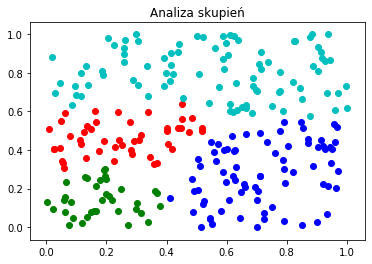

In [4]:
X = np.random.rand(500).reshape(-1,2)
k = 4
labels = spectral_clustering(X, k, 8)
plot_2D(X, k, labels)

#### 2. Przykład zbioru danych z R<sup>3</sup>

Poniżej został przedstawiony przykład obliczeń dla losowych wektorów z przestrzeni R<sup>3</sup>. 

Wygenerowano 300 losowych wartości rzeczywistych i ułożono je w tablicę o wymiarach (100,3). Następnie jako liczbę skupień przyjęto 2 i wykonano funkcję **spectral_clustering**. 

Wynik uzyskanej klasyfikacji jest widoczny na poniższym wykresie:

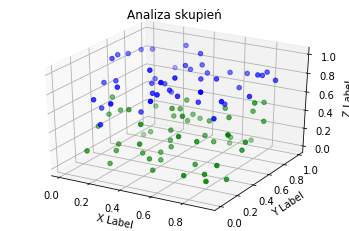

In [6]:
X = np.random.rand(300).reshape(-1,3)
k = 2
labels = spectral_clustering(X, k, 5)
plot_3D(X, k, labels)

## Testy poprawności zaimplementowanych metod

Do przeprowadzenia testów poprawności wykorzystano funkcję **adjusted_rand_score** z pakietu *sklearn.metrics.cluster*.

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

### Test 1

Za pomocą wielowymiarowego rozkładu normalnego tworzone są dwa skupiska punktów w przestrzeni R<sup>2</sup>.

In [8]:
pts = 50
a = np.random.multivariate_normal([0, 0], [[10, 1], [1, 10]], size=pts)
b = np.random.multivariate_normal([20, 10], [[10, 2], [2, 10]], size=pts)
X = np.vstack((a, b))

Rozmieszczenie punktów ze zbioru *X* prezentuje poniższy wykres:

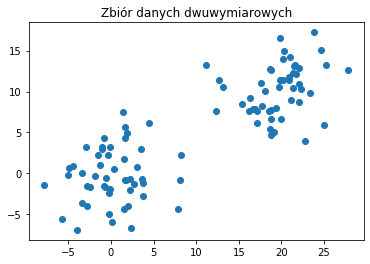

In [9]:
show_input(X,'Zbiór danych dwuwymiarowych')

Analizując powyższy wykres, możemy przypisać dwie etykiety do tego zbioru danych:
    * skupisko o wartości średniej [0,0]
    * skupisko o wartości średniej [20,10]

Dla każdego punktu przypisujemy odpowiadającą mu referencyjną etykietę, biorąc pod uwagę z którego rozkładu został otrzymany:

In [10]:
label_a = np.array([0] * pts)
label_b = np.array([1] * pts)
labels_true = np.hstack((label_a, label_b))

Na tak przygotowanych danych wykonujemy zaimplementowany algorytm spektralny:

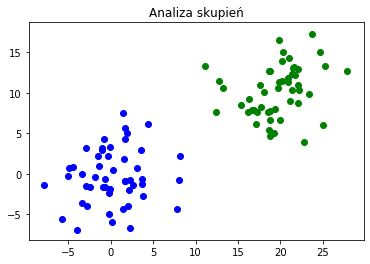

In [11]:
k = 2
labels_pred = spectral_clustering(X, k, 5)
plot_2D(X, k, labels_pred)

Z powyższego wykresu, możemy wnioskować, że obserwacje zostały poprawnie przydzielone do etykiet. Jednak do oceny jakości podziału możemy posłużyć się **skorygowanym indeksem Randa** z biblioteki *sklearn.metrics*: 

In [12]:
adjusted_rand_score(labels_true, labels_pred)

1.0

Otrzymany wynik 1.0 oznacza, że wszystkie wyznaczone etykiety zgadzają się z referencyjnymi, zatem algorytm analizy skupień jest dobry.

### Test 2

Tym razem do generacji zbioru danych R<sup>2</sup> zostanie wykorzystana funkcja **make_blobs** z biblioteki *sklearn.datasets*.

In [13]:
from sklearn.datasets import make_blobs

Stworzymy 4 zbiory punktów, których środki będą w punktach zdefiniowanych w tablicy *centers* :

In [14]:
centers = [[1, 4], [-1, -1], [2, -1], [-1, 3]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

Rozmieszczenie punktów ze zbioru *X* prezentuje poniższy wykres:

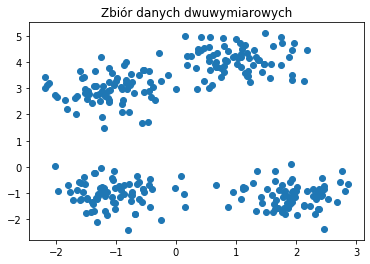

In [15]:
show_input(X,'Zbiór danych dwuwymiarowych')

Funkcja *make_blobs* od razu zwraca referencyjne etykiety, więc na tak przygotowanych danych możemy testować jakość podziału.

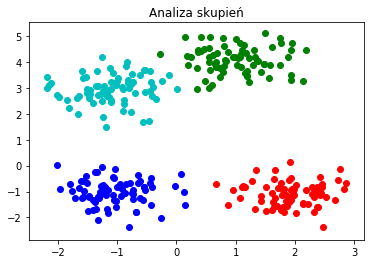

In [16]:
k = len(centers)
labels_pred = spectral_clustering(X, k, 5)
plot_2D(X, k, labels_pred)

Ponownie sprawdzamy miarę podobieństwa *k*-podziałów za pomocą skorygowanego indeksu Randa:

In [17]:
adjusted_rand_score(labels_true, labels_pred)

0.9910811504997546

W tym przypadku widzimy, że podział nie jest idealny, ale wartość miary jest bardzo zbliżona do 1.0, więc możemy wnioskować, że zaimplementowany algorymt jest dobry.

### Test 3

Ponownie skorzystamy z funckji **make_blobs** ale tym razem dla przestrzeni R<sup>3</sup>. 

Dodatkowo jako parametr odchylenia grup zastosujemy jego domyślną wartość, czyli *cluster_std*=1.

In [18]:
centers = [[1.5,1.5,1], [-1,-1,-1], [2,-2,2]]
X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=0)

Rozmieszczenie punktów ze zbioru *X* prezentuje poniższy wykres:

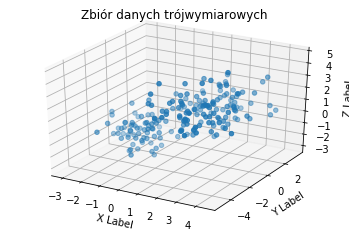

In [20]:
show_input(X,'Zbiór danych trójwymiarowych')

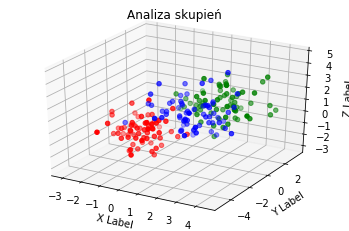

In [21]:
k = len(centers)
labels_pred = spectral_clustering(X, k, 5)
plot_3D(X, k, labels_pred)

Do sprawdzenia jakości podziału skorzystamy z indeksu Fowlkesa-Mallowsa, który jest obliczany przez funkcję **fowlkes_mallows_score** z pakietu *sklearn.metrics*:

In [22]:
from sklearn.metrics import fowlkes_mallows_score

In [23]:
fowlkes_mallows_score(labels_true, labels_pred)

0.9512715090604539

Otrzymana wartość jest bliska 1.0, to znaczy, że *k*-podziały są bardzo podobne, więc algorytm jest dobry.

### Test 4

Do tego testu zostaną użyte punkty z przestrzeni R<sup>4</sup>, zatem zostaną tylko porównane *k*-podziały (bez graficznej reprezentacji).

In [24]:
centers = [[0,0,0,0], [1,1,1,1], [-1,-1,-1,-1], [-2, 2, -2, 2], [3,3,3,-3]]
X, labels_true = make_blobs(n_samples=400, centers=centers, cluster_std=0.7, random_state=0)

In [25]:
k = len(centers)
labels_pred = spectral_clustering(X, k, 7)

Ocena podziału według indeksu Fowlkesa-Mallowsa:

In [26]:
fowlkes_mallows_score(labels_true, labels_pred)

0.8309053242514568

Ocena podziału według skorygowanego indeksu Randa:

In [27]:
adjusted_rand_score(labels_true, labels_pred)

0.7886157884567352

Uzuskane oceny podziału są w tym teście mniejsze niż w poprzenich przypadkach dla przestrzeni o mniejszych wymiarach. Można również zauważyć, że wartość skorygowanego indeksu Randa jest mniejsza niż wartość indeksu Fowlkesa-Mallowsa. 

## Podsumowanie

Testy zostały przeprowadzone na zbiorach danych w przestrzeniach R<sup>2</sup>, R<sup>3</sup>, R<sup>4</sup>.

Dla każdego testu, otrzymane wartości miar podobieństwa *k*-podziałów (referencyjnego oraz wygenerowanego) były bliskie 1.0.

Zatem ocena jakości podziału wykazała, że zaimplementowany algorytm spektralny jest dobry, to znaczy generuje podziału podobne do referencyjnych etykiet. 